In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize

from sivqed.models.siv import SiV
from sivqed.models.cavity import Cavity, CavitySiV

plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [8, 5]

# No perturbations

## Empty cavity spectrum

In [51]:
freqs = np.linspace(-500, 500, 1000)

c = Cavity({"w_c" : 0, "k_in" : 43, "k_tot" : 65}, 
           {"w_up" : 0, "g_up" : 5.39, "gamma_up" : 0.05})
cavity_spectrum = c.reflectance(freqs, -1)
cavity_min = min(cavity_spectrum)

print(f"Cavity min = {cavity_min:.3}")
print(f"Cooperativity = {c.qubit_params['g_up']**2 / (c.cavity_params['k_tot'] * c.qubit_params['gamma_up']):.3}")

Cavity min = 0.104
Cooperativity = 8.94


## Obtain min/max values for SiV spectrum at various detunings

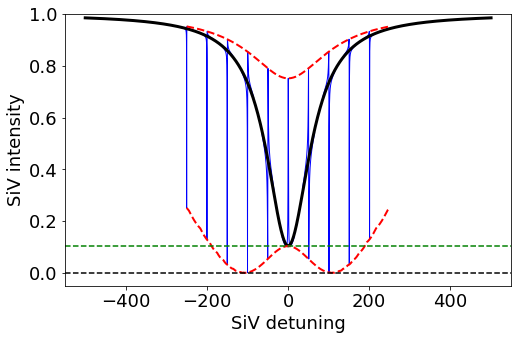

In [56]:
siv_min = []
siv_max = []
detuning_freqs = np.linspace(-250, 250, 1000)

for idx, detuning in enumerate(detuning_freqs):
    # Set a particular value of detuning
    c.set_qubit_params({"w_up" : detuning})
    
    # Only plot the spectrum around the SiV resonance
    freqs_filtered = np.linspace(detuning - 15, detuning + 15, 2000)
    siv_spectrum_filtered = c.reflectance(freqs_filtered, 1)
    # Only plot a few spectra
    if idx % 100 == 0:
        plt.plot(freqs_filtered, siv_spectrum_filtered, 'b', lw=1, label="up")
    
    siv_min.append(min(siv_spectrum_filtered))
    siv_max.append(max(siv_spectrum_filtered))
    
siv_min = np.array(siv_min)
siv_max = np.array(siv_max)

# Plot the empty cavity spectrum
plt.plot(freqs, cavity_spectrum, 'k', lw=3, label="empty")
# Plot the min and max SiV spectrum envelope
plt.plot(detuning_freqs, siv_min, 'r--', lw=2)
plt.plot(detuning_freqs, siv_max, 'r--', lw=2)

plt.xlabel("SiV detuning")
plt.ylabel("SiV intensity")
plt.ylim(-0.05, 1.0)
plt.axhline(0.0, c='k', ls='--', lw=1.5)
plt.axhline(cavity_min, c='g', ls='--', lw=1.5)

siv_contrast = [max_val / min_val for (min_val, max_val) in zip(siv_min, siv_max)]

### Plotting SiV peak contrast & SiV dip ratio (relative to cavity minimum)

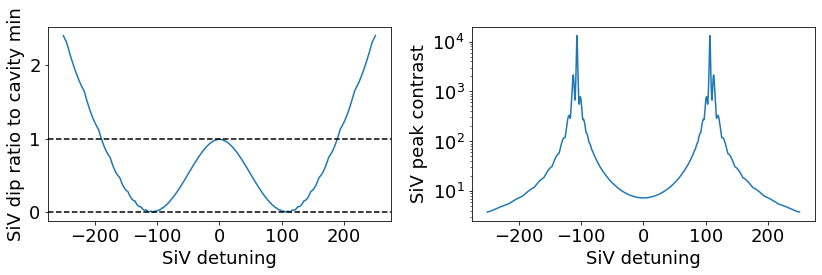

In [57]:
fig, ax = plt.subplots(1, 2, figsize=[12, 4])

ax[0].plot(detuning_freqs, siv_min / cavity_min)
ax[0].axhline(0.0, c='k', ls='--', lw=1.5)
ax[0].axhline(1.0, c='k', ls='--', lw=1.5)
ax[0].set_xlabel("SiV detuning")
ax[0].set_ylabel("SiV dip ratio to cavity min")

ax[1].semilogy(detuning_freqs, siv_contrast)
ax[1].set_xlabel("SiV detuning")
ax[1].set_ylabel("SiV peak contrast")

fig.tight_layout()

# -----------------------------
# Spectral Diffusion

## Testing convolution vs weighted translation vs changing detuning
There are 3 options for simulating spectral diffusion:
1. Convolve the original SiV spectrum with a Gaussian
2. Translate the SiV spectrum by some amount and weigh by a Gaussian (should be same as 1)
3. Change the detuning by some amount and weigh by a Gaussian (should be same as 2 in limit of small diffusion, i.e. when changing detuning only translates and does not change peak shape much)

## Fixed diffusion value

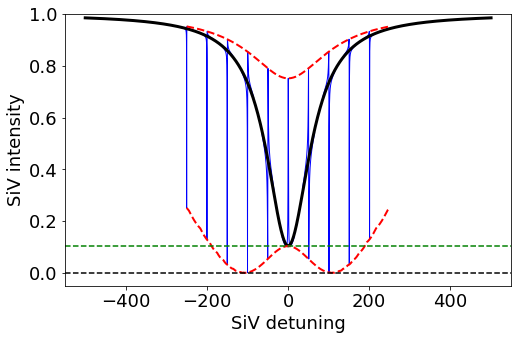

In [59]:
siv_min = []
siv_max = []
detuning_freqs = np.linspace(-250, 250, 1000)

for idx, detuning in enumerate(detuning_freqs):
    # Set a particular value of detuning
    c.set_qubit_params({"w_up" : detuning})
    
    # Only plot the spectrum around the SiV resonance
    freqs_filtered = np.linspace(detuning - 15, detuning + 15, 2000)
    siv_spectrum_filtered = c.reflectance(freqs_filtered, 1)
    # Only plot a few spectra
    if idx % 100 == 0:
        plt.plot(freqs_filtered, siv_spectrum_filtered, 'b', lw=1, label="up")
    
    siv_min.append(min(siv_spectrum_filtered))
    siv_max.append(max(siv_spectrum_filtered))
    
siv_min = np.array(siv_min)
siv_max = np.array(siv_max)

# Plot the empty cavity spectrum
plt.plot(freqs, cavity_spectrum, 'k', lw=3, label="empty")
# Plot the min and max SiV spectrum envelope
plt.plot(detuning_freqs, siv_min, 'r--', lw=2)
plt.plot(detuning_freqs, siv_max, 'r--', lw=2)

plt.xlabel("SiV detuning")
plt.ylabel("SiV intensity")
plt.ylim(-0.05, 1.0)
plt.axhline(0.0, c='k', ls='--', lw=1.5)
plt.axhline(cavity_min, c='g', ls='--', lw=1.5)

siv_contrast = [max_val / min_val for (min_val, max_val) in zip(siv_min, siv_max)]